## 2. Experimentation on a simple Machine Learning algorithm

The **k-nearest neighbour** is one of the simplest algorithm used in Machine Learning. This algorithm classifies objects based on **features**. In Machine Learning, a **feature** is an individual measurable property or characteristic of a phenomenon being observed.

Assuming that we want to develop a program to identify whether a person is a ballet dancer or a rugby player, which of the following features you consider distinguishing? Run the following cell and select the answer.

In [1]:
from SelectionWidget import *
from getFeedbackOnFeatureSelection import *
from IPython.display import *

#SelectionWidget generator - please don't change
newWidget = SelectionWidget (['Height', 'Weight', 'Age', 'Sex', 'Name'], 'Features')
newWidget.createSelectMultiple()
newWidget.displayWidget()

#Generate the feedback - please don't change the code

feedbackQ1 = getFeedbackOnFeatureSelection(newWidget)
feedbackQ1.createButton("Get feedback")
feedbackQ1.displayButton()

def on_button_clicked(b):
    clear_output()
    feedbackQ1.printFeedback(newWidget)
feedbackQ1.button.on_click(on_button_clicked)

✔ The height is a distinguishing measurement as normally ballet dancers are taller than rugby players.
✔ The average weight of an England rugby player is 105 kg. A ballet dancer's weight is between 40 - 60 kg.


In our analysis, consider the datasets below collected from a sample of ballet dancers and rugby players. In this table, we will represent **males** as 0 and **females** as 1.

|Person|Sex (0/1)|Age |Weight (Kg)|Height (cm)|
|------|---------|----|-----------|-----------|
|     1|        1|  24|         63|        190|
|     2|        1|  20|         55|        185|
|     3|        1|  25|         75|        202|
|     4|        1|  30|         50|        180|
|     5|        1|  19|         57|        174|
|     6|        0|  31|         66|        174|
|     7|        0|  31|         85|        150|
|     8|        0|  28|         93|        145|
|     9|        0|  29|         75|        130|
|    10|        0|  24|         99|        163|
|    11|        0|  30|        100|        171|
|    12|        1|  25|         84|        168|

Now, let's represent these values in 2-dimensional spaces taking different groups of 2 features into consideration. Please execute the code below to see how **weight** and **age** data is distributed in a 2 dimensional space.

In [2]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

#Collect the weights and ages from the table
weights = [63, 55, 75, 50, 57, 66, 85, 93, 75, 99, 100, 84]
ages = [24, 20, 25, 30, 19, 31, 31, 28, 29, 24, 30, 25]

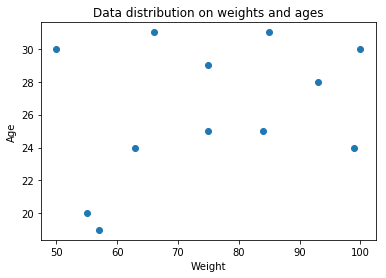

In [3]:
#Plot the graph
plt.scatter(weights,ages)
plt.title("Data distribution on weights and ages")
plt.xlabel("Weight")
plt.ylabel("Age")
plt.show()

It seems that from the graphic above it's impossible to identify **clusters**. This is because the age is not a distinguishing element that could separate rugby players and ballet dancers. Let's see how it works with **heights** and **weights**.

In [4]:
#Collect the heights and weights from the table
heights = [190, 185, 202, 180, 174, 174, 150, 145, 130, 163, 171, 168]
weights = [63, 55, 75, 50, 57, 66, 85, 93, 75, 99, 100, 84]

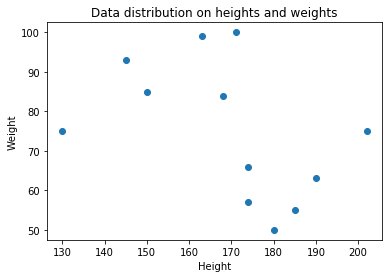

In [5]:
#Plot the graph
plt.scatter(heights,weights)
plt.title("Data distribution on heights and weights")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

By choosing the **heights** and **weights** features to classify these examples, two clusters of data can be distinguished: *top-left* and *bottom-right*. 

In your opinion, which one of these represents the rugby players? Execute the code below and choose your answer.

✔ Your answer is correct. Generally, rugby players are heavier and smaller than ballet dancers.


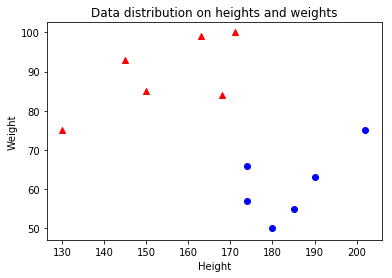

In [6]:
#Create the selection box - please don't change
from getFeedbackOnClusters import *

clusterWidget = SelectionWidget (['Top-left', 'Bottom-right'], 'Clusters')
clusterWidget.createSelectSingle()
clusterWidget.displayWidget()

#Create the feedback button - don't change the code
feedbackQ2 = getFeedbackOnClusters(clusterWidget)
feedbackQ2.createButton("Get feedback")
feedbackQ2.displayButton()

def on_button_clicked(b):
    clear_output()
    feedbackQ2.printFeedback(clusterWidget)
feedbackQ2.button.on_click(on_button_clicked)

Now that we clearly identified  2 data clusters (i.e. ballet dancers and rugby players), we can introduce our own data and predict whether our example is a rugby player or a ballet dancer. The data will be classified by the aid of the **k-nearest algorithm** which is designed (as the name suggests), to identify which class the new objects belongs to depending on the nearest **k** neighbours. In this case, to calculate the distance between the input point and its neighbours, we'll use the **Pythagorean formula**: $$d = \sqrt{(x_{2} - x_{1})^2 + (y_{2}-y_{1})^2}$$

For now, let's preapare the data from the graph into a matrix that can be processed by the algorithm. Execute the cell below.

In [7]:
featuresMatrix = np.c_[transpose(heights), transpose(weights)]
labelsMatrix = transpose([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])
trainingMatrix = np.c_[featuresMatrix, labelsMatrix]

Next, replace the words in '?' the code below to introduce your testing point containing the height and weight of a famouse rugby player or ballet dancer.

In [8]:
#replace the ? below with your own testing value and run the code
import math

distances = np.empty([0,2])

height = 190
weight = 70

#calculate the distances
for trainingPoint in trainingMatrix:
    distance = math.sqrt((trainingPoint[0] - height)**2 + (trainingPoint[1] - weight)**2)
    distances = np.vstack([distances, [distance, trainingPoint[2]]])

#sort the distances    
distances = distances[distances[:,0].argsort()]

#count the nearest neighbours
classOne = 0
classTwo = 0

for i in range(0, int(len(heights)/2)):
    if distances[i][1] == 1:
        classOne = classOne + 1
    else:
        classTwo = classTwo + 1
#Print out the result
if classOne > classTwo:
    print("Ballet dancer")
else:
    print("Rugby player")

Ballet dancer


Below you can interact with the K-nearest algorithm in a more elegant way. Run the code below, test your own examples (e.g. from [England Rugby website](https://www.englandrugby.com)) and write a short report below about how accurate the prediction was. Your report should include the **accuracy percentage (number of correct predictions / total number of predictions)** and **the number of examples** you have tested. 

In [ ]:
#Generate the GUI - please don't change
#Run this cell. To get another prediction, run the code again.
from InputWidget import *
from knearest import *

heightBox = InputWidget ("Height", 160, 100, 250)
heightBox.createFloatInputWidget()
heightBox.displayInputWidget()

weightBox = InputWidget ("Weight", 65, 30, 150)
weightBox.createFloatInputWidget()
weightBox.displayInputWidget()

#Generate the prediction with knearest - please don't change the code

prediction = knearest(heightBox, weightBox, trainingMatrix)
prediction.createButton("Predict")
prediction.displayButton()

def on_button_clicked(b):
    clear_output()
    prediction.printPrediction("Ballet dancer", "Rugby player", 6)
prediction.button.on_click(on_button_clicked)

Write your short report in this cell.

One of topics you have experienced as part the Module 3 was "Biases in data". To refresh you memory about this concept, please click on the link below and watch the video.

https://youtu.be/IRSHDfLphFI 

|Person|Sex (0/1)|Age |Weight (Kg)|Height (cm)|Label (ballet/rugby)|
|------|---------|----|-----------|-----------|--------------------|
|     1|        1|  24|         63|        190|                   b|
|     2|        1|  25|         84|        168|                   r|
|     3|        1|  20|         55|        185|                   b|
|     4|        1|  25|         75|        202|                   b|
|     5|        0|  24|         99|        163|                   r|
|     6|        1|  30|         50|        180|                   b|
|     7|        0|  29|         75|        130|                   r|
|     8|        1|  19|         57|        174|                   b|
|     9|        0|  31|         66|        174|                   b|
|    10|        0|  31|         85|        150|                   r|
|    11|        0|  28|         93|        145|                   r|
|    12|        0|  30|        100|        171|                   r|


Based on the data above, similarly, we can create a rule to predict if someone is a ballet dancer or rugby player based on their **weight** and **sex**. The rule might sound like this: A **female** weighing less than **75 kg** is not a **rugby player**. Regardless of the way we select the training and testing sets, this rule would make a 100% accurate prediction. However, if you have a look on the England Rugby website, there are plenty of female rugby players weighing less than **75kg**, and the rule would not achieve such high accuracy. In this particular case, the bias in data arose from the fact that the data was collected from groups of people sharing the same particularity (i.e. gender). Therefore, proper randomization was not achieved, and the sample of data does not accurately represent the population we want to analyse.

Having these examples in mind, reflect on a situation where the propagation of bias in data could have serious consequences (e.g. a Machine Learning recruiting algorithm, a crime-predicting software etc.).

Write your short report in this cell.